<a href="https://colab.research.google.com/github/Sophiat-O/c02_emission_analysis/blob/main/Data_Analysis_of_Car_C02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import pearsonr, spearmanr
from sklearn.decomposition import PCA

In [2]:
df = pd.read_csv("https://www.nrcan.gc.ca/sites/nrcan/files/oee/files/csv/MY2021%20Fuel%20Consumption%20Ratings.csv", header=[0, 1], encoding="latin-1")
df = df.dropna(subset=[("Model", "Unnamed: 2_level_1")]).dropna(axis=1)

df.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,1,2,3,6,7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Model,Make,Model,Vehicle Class,Engine Size,Cylinders,Transmission,Fuel,Fuel Consumption,Unnamed: 9_level_0,Unnamed: 10_level_0,Unnamed: 11_level_0,CO2 Emissions,CO2,Smog
,Year,Unnamed: 1_level_1,Unnamed: 2_level_1,Unnamed: 3_level_1,(L),Unnamed: 5_level_1,Unnamed: 6_level_1,Type,City (L/100 km),Hwy (L/100 km),Comb (L/100 km),Comb (mpg),(g/km),Rating,Rating
0,2021,Acura,ILX,Compact,2.4,4.0,AM8,Z,9.9,7.0,8.6,33.0,199.0,6.0,3.0
1,2021,Acura,NSX,Two-seater,3.5,6.0,AM9,Z,11.1,10.8,11.0,26.0,256.0,4.0,3.0
2,2021,Acura,RDX SH-AWD,SUV: Small,2.0,4.0,AS10,Z,11.0,8.6,9.9,29.0,232.0,5.0,6.0
3,2021,Acura,RDX SH-AWD A-SPEC,SUV: Small,2.0,4.0,AS10,Z,11.3,9.1,10.3,27.0,242.0,5.0,6.0
4,2021,Acura,TLX SH-AWD,Compact,2.0,4.0,AS10,Z,11.2,8.0,9.8,29.0,230.0,5.0,7.0


In [3]:
df.columns = [
  "year", "brand", "model", "vehicle_class", "engine_size", "cylinders", "transmission", "fuel_type", "fuel_consumption", "Hwy", "Comb", "Comb_mpg", "co2_emissions", "co2_rating", "smog_rating"
]

In [4]:
brand = df['brand']

In [5]:
brand.value_counts()

Ford             87
Chevrolet        84
Mercedes-Benz    72
Porsche          63
GMC              61
BMW              54
Toyota           49
Audi             43
Jeep             36
Mazda            29
Hyundai          27
Lexus            27
Kia              25
Honda            23
Nissan           22
MINI             22
Cadillac         22
Dodge            22
Ram              16
Subaru           16
Volkswagen       16
Volvo            13
Maserati         11
Rolls-Royce      10
Lamborghini       9
Buick             9
Genesis           8
Bentley           8
Lincoln           7
Chrysler          6
Acura             6
Aston Martin      6
Infiniti          6
Alfa Romeo        6
Jaguar            6
Mitsubishi        5
Bugatti           2
FIAT              1
Name: brand, dtype: int64

In [6]:
df['fuel_type'] = df['fuel_type'].str.replace("Z", "Premium Gasoline")
df['fuel_type'] = df['fuel_type'].str.replace("X", "Regular Gasoline")
df['fuel_type'] = df['fuel_type'].str.replace("D", "Diesel")
df['fuel_type'] = df['fuel_type'].str.replace("E", "Ethanol(E85)")
df['fuel_type'] = df['fuel_type'].str.replace("N", "Natural Gas")

In [7]:
dd = df.groupby(["brand", "fuel_type"]).agg({"year": "count"})
dd['percent'] = dd.groupby(level=0).transform(lambda x: (x / x.sum()).round(2))
dd = dd.reset_index()
dd

,brand,fuel_type,year,percent
0,Acura,Premium Gasoline,6,1.00
1,Alfa Romeo,Premium Gasoline,6,1.00
2,Aston Martin,Premium Gasoline,6,1.00
3,Audi,Premium Gasoline,39,0.91
4,Audi,Regular Gasoline,4,0.09
...,...,...,...,...
60,Toyota,Regular Gasoline,47,0.96
61,Volkswagen,Premium Gasoline,1,0.06
62,Volkswagen,Regular Gasoline,15,0.94
63,Volvo,Premium Gasoline,12,0.92


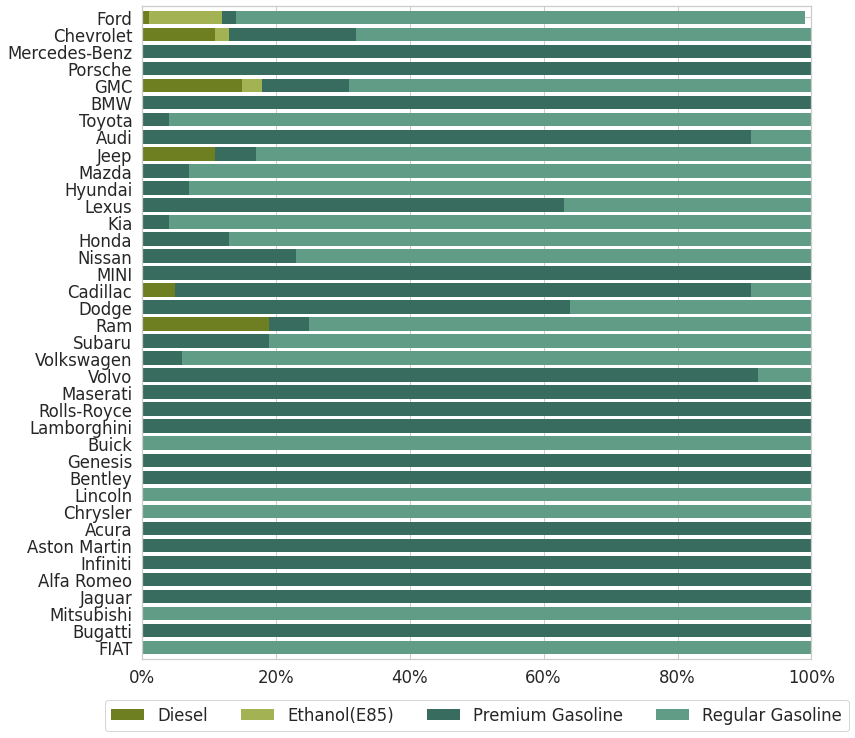

In [8]:
sns.set(font_scale=1.5, rc={"figure.figsize": (12, 12)}, style="whitegrid")

df_chart = dd.pivot(index="brand", columns="fuel_type", values="percent")
df_chart = df_chart.reindex(brand.value_counts().index, axis=0)
g = df_chart.plot.barh(stacked=True, lw=0, width=0.8, color=["#6D7F21","#A3B354","#386C5F","#619C86"])
g.invert_yaxis()
g.set_xticklabels([f"{int(x * 100)}%" for x in g.get_xticks()])
plt.margins(x=0)

g.legend(loc="upper center", bbox_to_anchor=(0.5, -0.05), ncol=4)

In [9]:
df['transmission'] = df['transmission'].str.replace('\d+', '')

df["transmission"] = np.where(df["transmission"]=="A", "Automatic", df["transmission"])
df["transmission"] = np.where(df["transmission"]=="AM", "Automated Manual", df["transmission"])
df["transmission"] = np.where(df["transmission"]=="AS", "Automatic with Select Shift", df["transmission"])
df["transmission"] = np.where(df["transmission"]=="AV", "Continuously Variable", df["transmission"])
df["transmission"] = np.where(df["transmission"]=="M", "Manual", df["transmission"])



In [10]:
tr = df.groupby(["brand", "transmission"]).agg({"year": "count"})
tr['percent'] = tr.groupby(level=0).transform(lambda x: (x / x.sum()).round(2))
tr = tr.reset_index()
tr

,brand,transmission,year,percent
0,Acura,Automated Manual,2,0.33
1,Acura,Automatic with Select Shift,4,0.67
2,Alfa Romeo,Automatic,6,1.00
3,Aston Martin,Automatic,5,0.83
4,Aston Martin,Manual,1,0.17
...,...,...,...,...
79,Toyota,Manual,6,0.12
80,Volkswagen,Automated Manual,2,0.12
81,Volkswagen,Automatic with Select Shift,10,0.62
82,Volkswagen,Manual,4,0.25


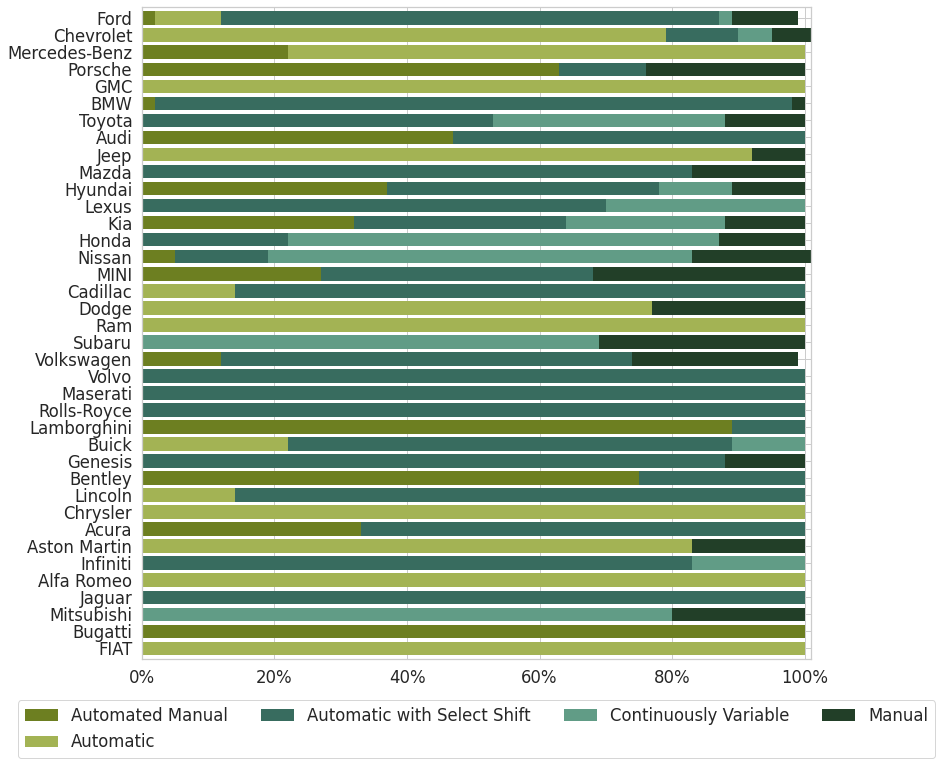

In [11]:
#tr.pivot(index="brand", columns="transmission", values="percent").plot.barh(stacked=True)


sns.set(font_scale=1.5, rc={"figure.figsize": (12, 12)}, style="whitegrid")

tr_chart = tr.pivot(index="brand", columns="transmission", values="percent")
tr_chart = tr_chart.reindex(brand.value_counts().index, axis=0)
g = tr_chart.plot.barh(stacked=True, lw=0, width=0.8, color=["#6D7F21","#A3B354","#386C5F","#619C86","#223F28"])
g.invert_yaxis()
g.set_xticklabels([f"{int(x * 100)}%" for x in g.get_xticks()])
plt.margins(x=0)

g.legend(loc="upper center", bbox_to_anchor=(0.5, -0.05), ncol=4)

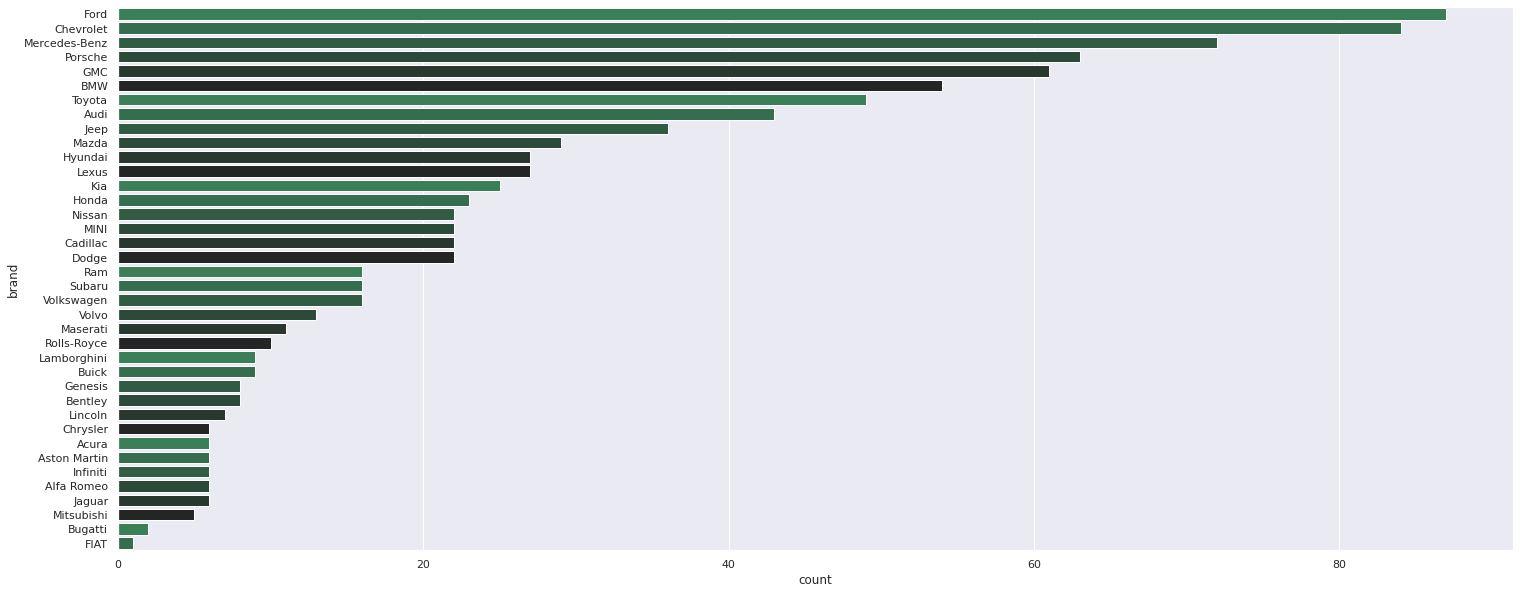

In [12]:
sns.set(rc = {'figure.figsize':(25,10)})
sns.countplot(y="brand", data=df, palette=sns.dark_palette("seagreen", reverse=True),order = brand.value_counts().index)

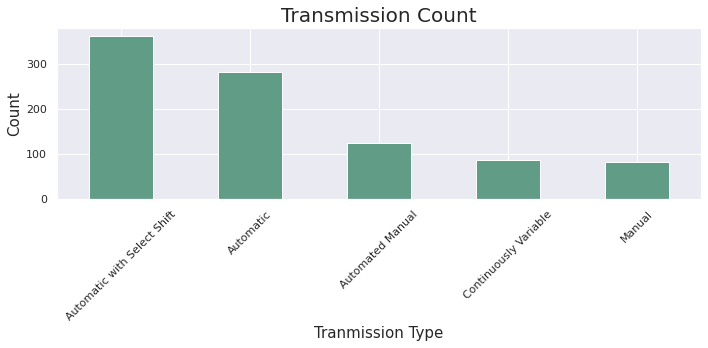

In [19]:
sns.set(rc = {'figure.figsize':(10,5)})
tr_count = df.groupby("transmission")["transmission"].count().sort_values(ascending=False)
tr_count.plot(kind="bar", color="#619C86")
plt.title("Transmission Count", fontsize=20)
plt.ylabel("Count", fontsize=15)
plt.xlabel("Tranmission Type", fontsize=15)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

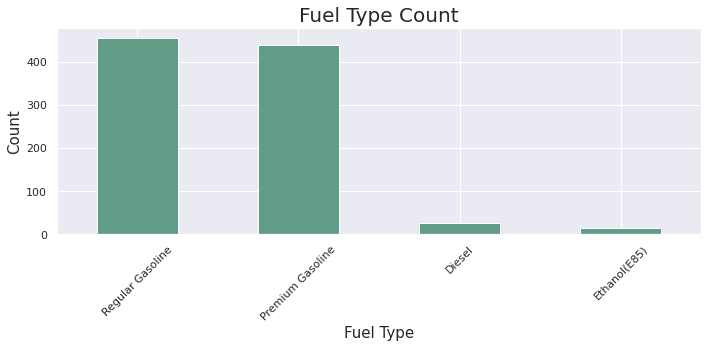

In [20]:
sns.set(rc = {'figure.figsize':(10,5)})
ft_count = df.groupby("fuel_type")["fuel_type"].count().sort_values(ascending=False)
ft_count.plot(kind="bar", color="#619C86")
plt.title("Fuel Type Count", fontsize=20)
plt.ylabel("Count", fontsize=15)
plt.xlabel("Fuel Type", fontsize=15)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Text(0, 0.5, 'CO2 Emissions')

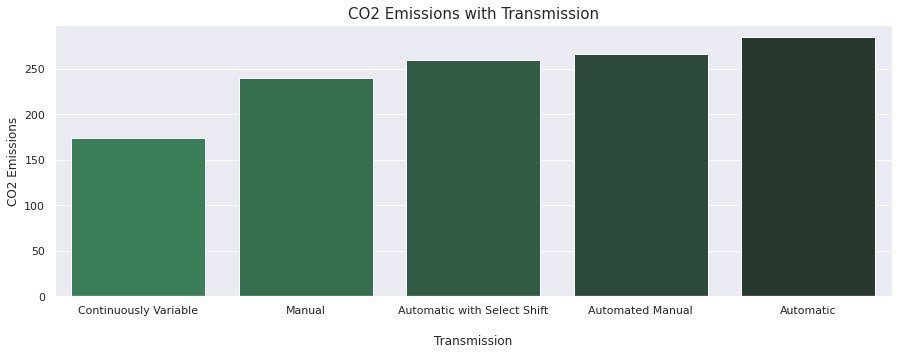

In [15]:
emission_transmission = df.groupby(["transmission"])["co2_emissions"].mean().sort_values().reset_index()

sns.set(rc = {'figure.figsize':(15,5)})
sns.barplot(x = "transmission",y="co2_emissions", data = emission_transmission,
            palette=sns.dark_palette("seagreen", reverse=True))
plt.title('CO2 Emissions with Transmission', fontsize=15)
plt.xlabel('\nTransmission', fontsize=12)
plt.xticks(horizontalalignment='center')
plt.ylabel('CO2 Emissions', fontsize=12)

Text(0, 0.5, 'CO2 Emissions')

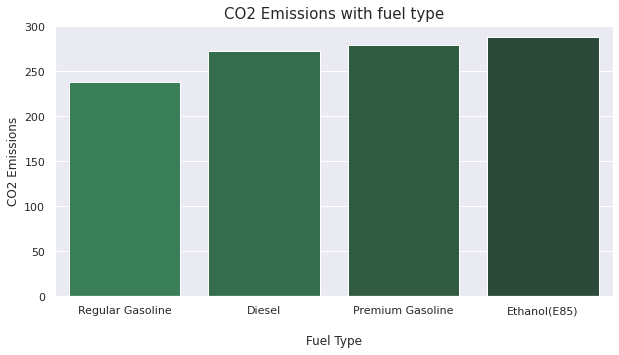

In [16]:
emission_fuel = df.groupby(["fuel_type"])["co2_emissions"].mean().sort_values().reset_index()

sns.set(rc = {'figure.figsize':(10,5)})
sns.barplot(x = "fuel_type",y="co2_emissions", data = emission_fuel,
            palette=sns.dark_palette("seagreen", reverse=True))
plt.title('CO2 Emissions with fuel type', fontsize=15)
plt.xlabel('\nFuel Type', fontsize=12)
plt.xticks(horizontalalignment='center')
plt.ylabel('CO2 Emissions', fontsize=12)

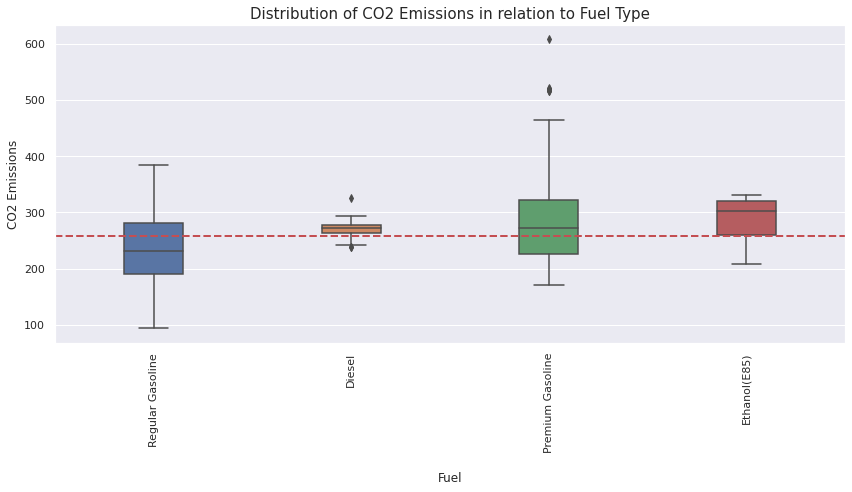

In [26]:
sns.set(rc = {'figure.figsize':(12,7)})
ft_distribution = df.groupby("fuel_type")["co2_emissions"].median().sort_values(ascending=True).index
sns.boxplot(x="fuel_type", y="co2_emissions", data=df, order=ft_distribution, width=0.3)
plt.title("Distribution of CO2 Emissions in relation to Fuel Type", fontsize=15)
plt.xticks(rotation=90, horizontalalignment='center')
plt.xlabel("\nFuel", fontsize=12)
plt.ylabel("CO2 Emissions", fontsize=12)
plt.axhline(df["co2_emissions"].mean(),color='r',linestyle='dashed',linewidth=2)
plt.tight_layout()
plt.show()

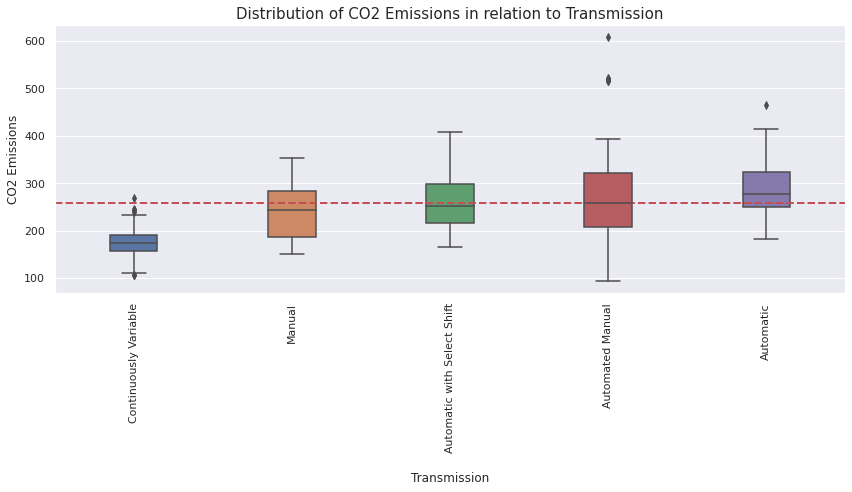

In [39]:
sns.set(rc = {'figure.figsize':(12,7)})
ft_distribution = df.groupby("transmission")["co2_emissions"].median().sort_values(ascending=True).index
sns.boxplot(x="transmission", y="co2_emissions", data=df, order=ft_distribution, width=0.3)
plt.title("Distribution of CO2 Emissions in relation to Transmission", fontsize=15)
plt.xticks(rotation=90, horizontalalignment='center')
plt.xlabel("\nTransmission", fontsize=12)
plt.ylabel("CO2 Emissions", fontsize=12)
plt.axhline(df["co2_emissions"].mean(),color='r',linestyle='dashed',linewidth=2)
plt.tight_layout()
plt.show()

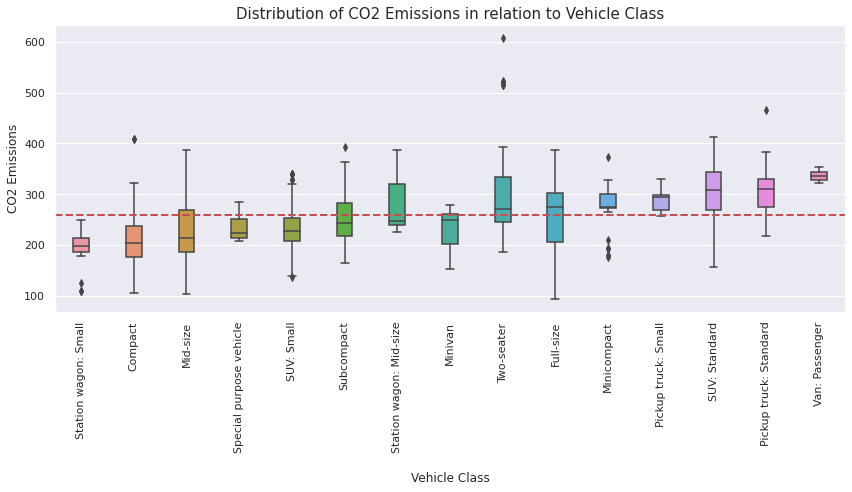

In [40]:
sns.set(rc = {'figure.figsize':(12,7)})
ft_distribution = df.groupby("vehicle_class")["co2_emissions"].median().sort_values(ascending=True).index
sns.boxplot(x="vehicle_class", y="co2_emissions", data=df, order=ft_distribution, width=0.3)
plt.title("Distribution of CO2 Emissions in relation to Vehicle Class", fontsize=15)
plt.xticks(rotation=90, horizontalalignment='center')
plt.xlabel("\nVehicle Class", fontsize=12)
plt.ylabel("CO2 Emissions", fontsize=12)
plt.axhline(df["co2_emissions"].mean(),color='r',linestyle='dashed',linewidth=2)
plt.tight_layout()
plt.show()

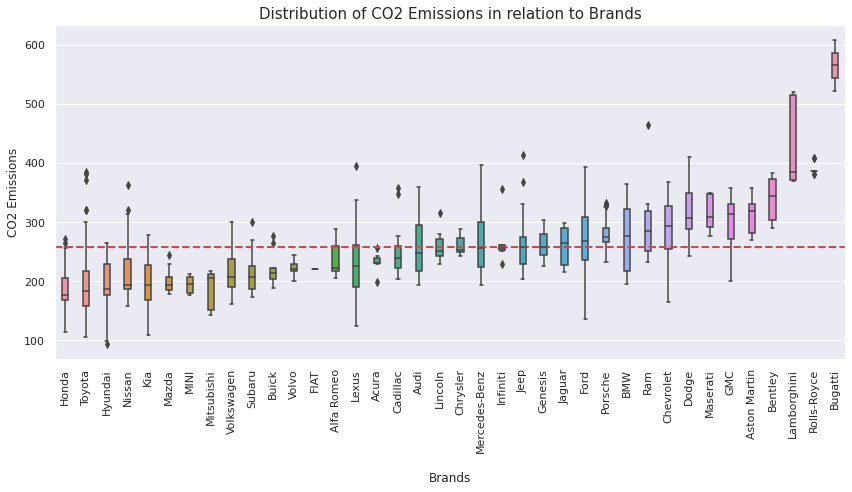

In [41]:
sns.set(rc = {'figure.figsize':(12,7)})
ft_distribution = df.groupby("brand")["co2_emissions"].median().sort_values(ascending=True).index
sns.boxplot(x="brand", y="co2_emissions", data=df, order=ft_distribution, width=0.3)
plt.title("Distribution of CO2 Emissions in relation to Brands", fontsize=15)
plt.xticks(rotation=90, horizontalalignment='center')
plt.xlabel("\nBrands", fontsize=12)
plt.ylabel("CO2 Emissions", fontsize=12)
plt.axhline(df["co2_emissions"].mean(),color='r',linestyle='dashed',linewidth=2)
plt.tight_layout()
plt.show()

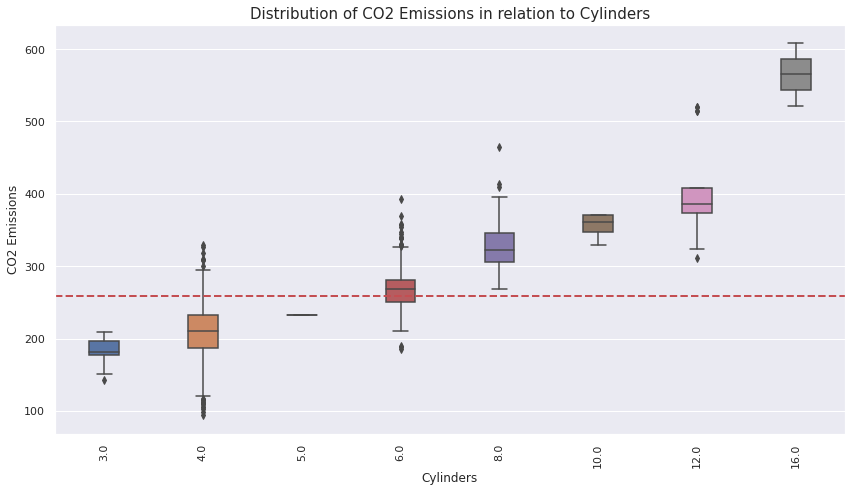

In [35]:
sns.set(rc = {'figure.figsize':(12,7)})
ft_distribution = df.groupby("cylinders")["co2_emissions"].median().sort_values(ascending=True).index
sns.boxplot(x="cylinders", y="co2_emissions", data=df, order=ft_distribution, width=0.3)
plt.title("Distribution of CO2 Emissions in relation to Cylinders", fontsize=15)
plt.xticks(rotation=90, horizontalalignment='center')
plt.xlabel("Cylinders", fontsize=12)
plt.ylabel("CO2 Emissions", fontsize=12)
plt.axhline(df["co2_emissions"].mean(),color='r',linestyle='dashed',linewidth=2)
plt.tight_layout()
plt.show()

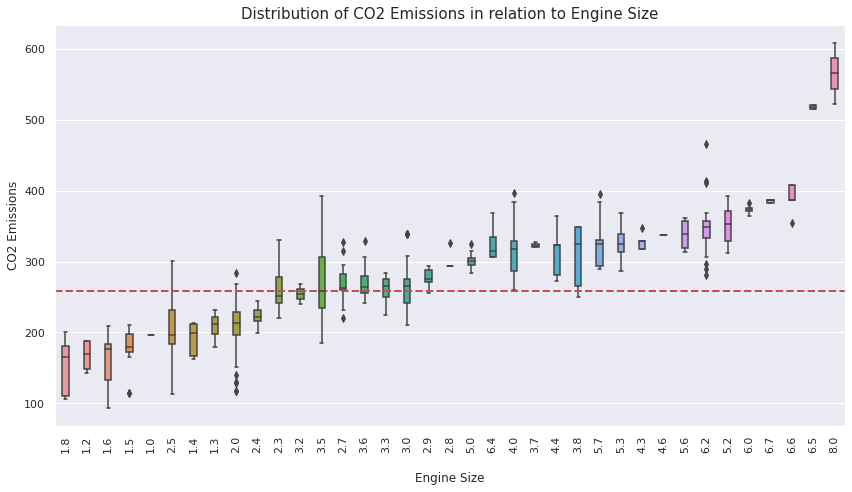

In [42]:
sns.set(rc = {'figure.figsize':(12,7)})
ft_distribution = df.groupby("engine_size")["co2_emissions"].median().sort_values(ascending=True).index
sns.boxplot(x="engine_size", y="co2_emissions", data=df, order=ft_distribution, width=0.3)
plt.title("Distribution of CO2 Emissions in relation to Engine Size", fontsize=15)
plt.xticks(rotation=90, horizontalalignment='center')
plt.xlabel("\nEngine Size", fontsize=12)
plt.ylabel("CO2 Emissions", fontsize=12)
plt.axhline(df["co2_emissions"].mean(),color='r',linestyle='dashed',linewidth=2)
plt.tight_layout()
plt.show()